In [1]:
!pip install numpy pandas matplotlib seaborn tensorflow keras opencv-python scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [12]:
from google.colab import files
uploaded = files.upload()


Saving ckextended.csv.zip to ckextended.csv (1).zip


In [17]:
# Load the dataset
import pandas as pd
data = pd.read_csv("/content/ckextended.csv.zip")
data.head()

,emotion,pixels,Usage
0,6,36 39 35 25 19 11 8 7 3 13 15 9 21 57 75 90 10...,Training
1,6,88 74 19 4 5 5 3 12 8 21 15 21 15 18 24 29 32 ...,Training
2,6,9 2 4 7 1 1 1 0 7 29 49 76 115 141 156 169 177...,Training
3,6,104 106 108 104 95 50 60 61 58 83 126 133 139 ...,Training
4,6,68 72 67 67 6 2 1 1 1 1 1 14 24 24 38 65 79 94...,Training


In [18]:
# Print the column names to verify
print(data.columns)

Index(['emotion', 'pixels', 'Usage'], dtype='object')


In [19]:
# Check dataset structure
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  920 non-null    int64 
 1   pixels   920 non-null    object
 2   Usage    920 non-null    object
dtypes: int64(1), object(2)
memory usage: 21.7+ KB
None


In [20]:
pixels = data['pixels'].tolist()
emotions = data['emotion'].values


In [21]:
images = np.array([np.fromstring(pixel, dtype=int, sep=' ') for pixel in pixels])
images = images.reshape(images.shape[0], 48, 48, 1)


In [22]:
images = images / 255.0


In [24]:
emotions = to_categorical(emotions, num_classes=8)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(images, emotions, test_size=0.2, random_state=42)


In [28]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential # This import is redundant as we are using keras.Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
model = keras.Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [35]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 46, 46, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,277,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │           2,056 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,353,608 (12.79 MB)

 Trainable params: 3,353,608 (12.79 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=25, batch_size=64)


Epoch 1/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 546ms/step - accuracy: 0.4981 - loss: 1.6839 - val_accuracy: 0.6892 - val_loss: 1.3518
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 618ms/step - accuracy: 0.6453 - loss: 1.3546 - val_accuracy: 0.6892 - val_loss: 1.5044
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 434ms/step - accuracy: 0.6279 - loss: 1.3822 - val_accuracy: 0.6892 - val_loss: 1.3570
Epoch 4/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 637ms/step - accuracy: 0.6249 - loss: 1.3312 - val_accuracy: 0.6892 - val_loss: 1.4023
Epoch 5/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 441ms/step - accuracy: 0.6409 - loss: 1.2964 - val_accuracy: 0.6892 - val_loss: 1.4123
Epoch 6/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 666ms/step - accuracy: 0.6526 - loss: 1.2557 - val_accuracy: 0.6892 - val_loss: 1.3442
Epoch 7/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 455ms/step - accuracy: 0.6315 - loss: 1.2268 - val_accuracy: 0.7027 - val_loss: 1.1765
Epoch 8/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 496ms/step - accuracy: 0.6607 - loss: 1.0881 - val_accuracy: 0

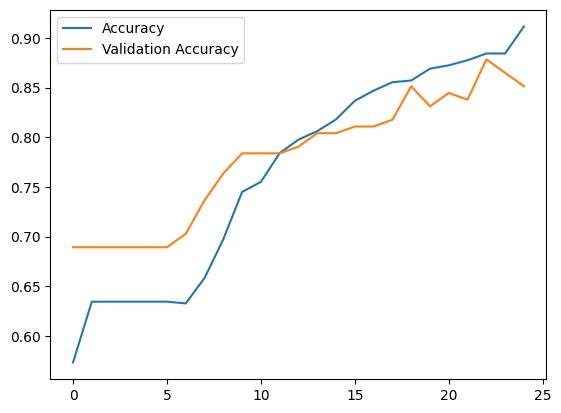

In [37]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


In [38]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.8523 - loss: 0.4813
Test Accuracy: 0.864130437374115


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


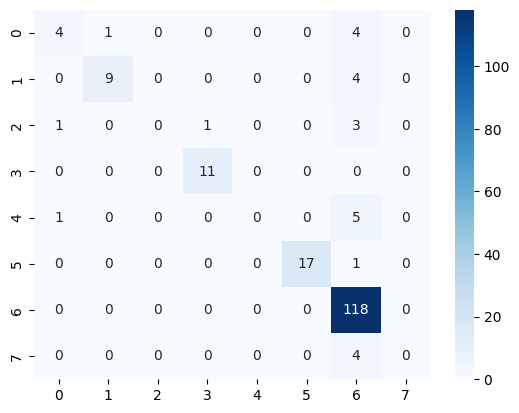

In [39]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()


Saving Screenshot 2024-12-30 002402.png to Screenshot 2024-12-30 002402 (1).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


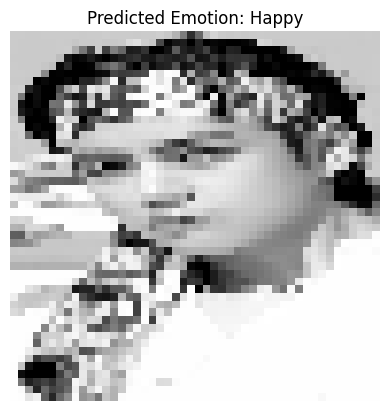

In [55]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Upload image
uploaded = files.upload()

# Load and preprocess the image
img_path = list(uploaded.keys())[0]  # Get the name of the uploaded file
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img_resized = cv2.resize(img, (48, 48))  # Resize to 48x48 for the model

# Normalize and reshape the image for model input
img_resized = img_resized.reshape(1, 48, 48, 1)  # Add batch dimension
img_resized = img_resized / 255.0  # Normalize to [0, 1]

# Predict emotion
prediction = model.predict(img_resized)
emotion_label = np.argmax(prediction)
emotion_dict = {0: 'Anger', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sadness', 5: 'Surprise', 6: 'Neutral'}
predicted_emotion = emotion_dict[emotion_label]

# Display the image and predicted emotion
plt.imshow(img_resized[0], cmap='gray')
plt.title(f"Predicted Emotion: {predicted_emotion}")
plt.axis('off')
plt.show()


In [56]:
model.save("facial_emotion_recognition.h5")

In [57]:
from google.colab import files
files.download("facial_emotion_recognition.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>